# Data Prep

## Tratamento de Missing

$$
\begin{aligned}
1) & \ \text{Deleção: Remover casos (linhas) ou variáveis (colunas) com valores missing.} \\
2) & \ \text{Imputação Simples: Substituir valores missing por estatísticas como média, mediana ou moda.} \\
3) & \ \text{Imputação por Regressão: Usar modelos de regressão para prever e substituir valores missing.} \\
4) & \ \text{Imputação Múltipla: Criar várias imputações para cada valor missing e combinar os resultados.} \\
5) & \ \text{Métodos baseados em modelos: Usar técnicas como k-NN ou algoritmos de machine learning para imputar valores missing.} \\ 
6) & \ \text{Utilização de Valores Específicos: Substituir valores missing por valores específicos, como 0 ou categorias "desconhecido"}
\end{aligned}
$$

**Principais métodos de imputação são:**
- Média
- Mediana
- Moda (mais utilizado em dados categóricos)

**Vantagem e desvantagem de imputação x delação:**

- Delação:
    - Vantagem: Simples de implentar e util quando há poucos missing
    - Desvantagem: Pode levar a perda de informação valiosa, reduz o tamanho da amostra e pode levar um vies caso o missing não seja aleatório

- Imputação:
    - Vantagem: Mantém o tamanho da amostra preservando informação e pode reduzir o vies
    - Desvantagem: Pode introduzir incertezas ou vieses se a imputação não for bem feita, especialmente em grandes proporções de dados faltantes.
    


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(titanic.shape)
print('')
display(titanic.isnull().sum())

(891, 15)



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Pode-se pensar em remover pela Idade os missing, porém pelo deck já fica inviavel pois há muitos missing.

In [ ]:
# Mode mais recomendado para dados categoricos
list_metodos = ['mean', 'median', 'mode']
list_v = []
for n, i in enumerate(list_metodos):
    df_titanic1 = titanic.copy()
    if n == 0 :
        print(i)
        df_titanic1['age'].fillna(df_titanic1['age'].mean(), inplace=True)
        list_v.append(df_titanic1.age.describe().values)
    elif n == 1:
        print(i)
        df_titanic1['age'].fillna(df_titanic1['age'].median(), inplace=True)
        list_v.append(df_titanic1.age.describe().values)
    elif n == 2:
        print(i)
        df_titanic1['age'].fillna(df_titanic1['age'].mode()[0], inplace=True)
        list_v.append(df_titanic1.age.describe().values)


list_v.append(titanic.age.describe().values)
list_metodos.append('original')
df_ = pd.DataFrame(index=df_titanic1.age.describe().index, data=np.array(list_v).T, columns=list_metodos)
df_

mean
median
mode


C:\Users\vgflg\AppData\Local\Temp\ipykernel_31084\1242386932.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic1['age'].fillna(df_titanic1['age'].mean(), inplace=True)
C:\Users\vgflg\AppData\Local\Temp\ipykernel_31084\1242386932.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,mean,median,mode,original
count,891.000000,891.000000,891.000000,714.000000
mean,29.699118,29.361582,28.566970,29.699118
std,13.002015,13.019697,13.199572,14.526497
min,0.420000,0.420000,0.420000,0.420000
25%,22.000000,22.000000,22.000000,20.125000
50%,29.699118,28.000000,24.000000,28.000000
75%,35.000000,35.000000,35.000000,38.000000
max,80.000000,80.000000,80.000000,80.000000


C:\Users\vgflg\AppData\Local\Temp\ipykernel_31084\1996252659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic1['deck'].fillna(df_titanic1['deck'].mode()[0], inplace=True)


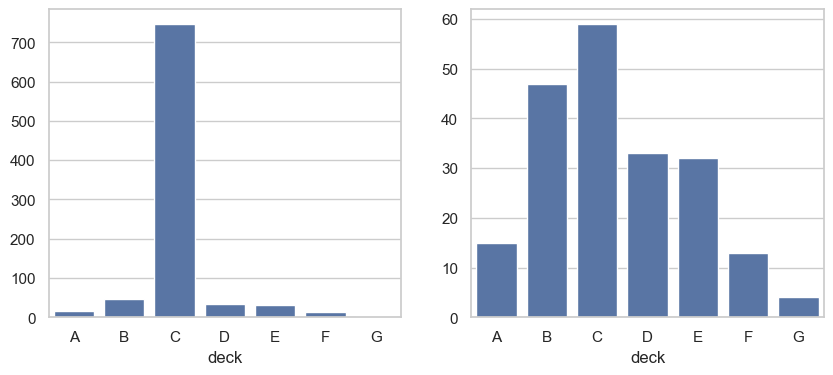

In [ ]:
df_titanic1 = titanic.copy()
df_titanic1['deck'].fillna(df_titanic1['deck'].mode()[0], inplace=True)


#Não parece ser o metodo mais ideal, pois cria uma distorção enorme
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(y=df_titanic1.deck.value_counts().values, x=df_titanic1.deck.value_counts().index)

plt.subplot(1, 2, 2)
sns.barplot(y=titanic.deck.value_counts().values, x=titanic.deck.value_counts().index)
plt.show()


In [ ]:
# Drop da variavel
df_titanic1 = titanic.copy()
df_titanic1.drop('deck', axis=1, inplace=True)
df_titanic1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
#Usando o SimpleImputer
from sklearn.impute import SimpleImputer


list_metodos = ['mean', 'median', 'most_frequent']
list_v = []
for n, i in enumerate(list_metodos):
    df_titanic1 = titanic.copy()
    if n == 0 :
        print(i)
        df_titanic1['age'] = SimpleImputer(missing_values=np.nan, strategy=i).fit_transform(np.reshape(np.array(df_titanic1['age']), (-1,1)))
        list_v.append(df_titanic1.age.describe().values)
    elif n == 1:
        print(i)
        df_titanic1['age'] = SimpleImputer(missing_values=np.nan, strategy=i).fit_transform(np.reshape(np.array(df_titanic1['age']), (-1,1)))
        list_v.append(df_titanic1.age.describe().values)
    elif n == 2:
        print(i)
        df_titanic1['age'] = SimpleImputer(missing_values=np.nan, strategy=i).fit_transform(np.reshape(np.array(df_titanic1['age']), (-1,1)))
        list_v.append(df_titanic1.age.describe().values)


list_v.append(titanic.age.describe().values)
list_metodos.append('original')
df_ = pd.DataFrame(index=df_titanic1.age.describe().index, data=np.array(list_v).T, columns=list_metodos)
df_

mean
median
most_frequent


,mean,median,most_frequent,original
count,891.000000,891.000000,891.000000,714.000000
mean,29.699118,29.361582,28.566970,29.699118
std,13.002015,13.019697,13.199572,14.526497
min,0.420000,0.420000,0.420000,0.420000
25%,22.000000,22.000000,22.000000,20.125000
50%,29.699118,28.000000,24.000000,28.000000
75%,35.000000,35.000000,35.000000,38.000000
max,80.000000,80.000000,80.000000,80.000000


![{6A703203-9C6A-4001-AB72-AA91BA8820DC}.png](attachment:{6A703203-9C6A-4001-AB72-AA91BA8820DC}.png)

---

## Tratamento de Outliers

1. $\textbf{Remoção de Outliers:}  $
   $$x_{sem\_outliers} = x[(x > Q_1 - k \cdot IQR) \land (x < Q_3 + k \cdot IQR)]$$  
   Onde:
   - \( $Q_1$ \) e \( $Q_3$ \) são os quartis
   -  \( IQR = $Q_3$ - $Q_1$ \), e \( k \) é um multiplicador, geralmente 1.5.

---

2. $\textbf{Transformação Logarítmica (para reduzir impacto):}  $
   $$x_{transf} = \log(x + c) \\
   
   $$  
   Onde ( c ) é uma constante para evitar valores negativos.

---


3. $\textbf{Z-Score para Identificação de Outliers:}$
   $$z = \frac{x - \mu}{\sigma}$$  
   Onde:
   - ($ \mu$ ) é a média 
   - ( $\sigma$ ) o desvio padrão. 
   - Valores de ( |z| > 3 ) são frequentemente considerados outliers.

---

4. $\textbf{Substituição por Mediana (imputação simples):}$  
   $$x_{corrigido} = 
   \begin{cases} 
   x & \text{se } Q_1 - k \cdot IQR \leq x \leq Q_3 + k \cdot IQR \\ 
   \text{mediana}(x) & \text{caso contrário}
   \end{cases}$$

---

**Método Baseado em Quantis (IQR)**:
-   Aqueado para dados assimetricos ou não normais
- Menos Sensivel ao outilers, pois usam dados não paramétricos (mediana e o quartis)

**Z-score**:
- Mais sensivel a outliers, pois utiliza a média e desvio padrão
- Mais adequado para dados que seguem aproximadamente uma normal

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


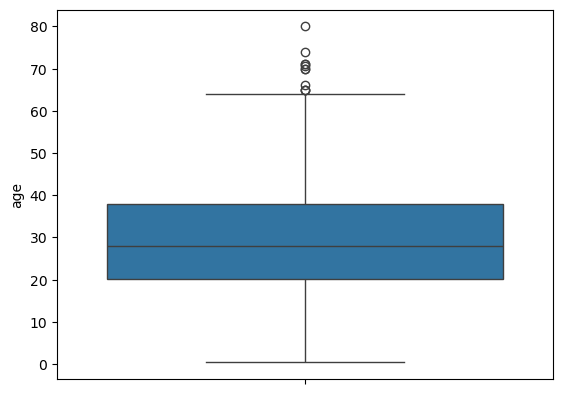

In [ ]:
sns.boxplot(data=titanic , y='age')
plt.show()

In [ ]:
# Selecionando a coluna 'age' para análise
coluna = 'age'
q1 = titanic[coluna].quantile(0.25)  # Primeiro quartil (Q1)
q3 = titanic[coluna].quantile(0.75)  # Terceiro quartil (Q3)
iqr = q3 - q1  # Intervalo interquartil (IQR)

# Limites para detectar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrando os outliers
outliers = titanic[((titanic[coluna] < limite_inferior) | (titanic[coluna] > limite_superior))]
print(outliers[coluna])

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64


In [ ]:
from scipy.stats import zscore

# Calculando o Z-Score para a coluna 'age'
titanic['zscore_age'] = zscore(titanic['age'].fillna(28))

# Filtrando os outliers
outliers = titanic[(titanic['zscore_age'] > 3) | (titanic['zscore_age'] < -3)]
print(outliers[['age', 'zscore_age']])

      age  zscore_age
96   71.0    3.199906
116  70.5    3.161481
493  71.0    3.199906
630  80.0    3.891554
672  70.0    3.123056
745  70.0    3.123056
851  74.0    3.430455


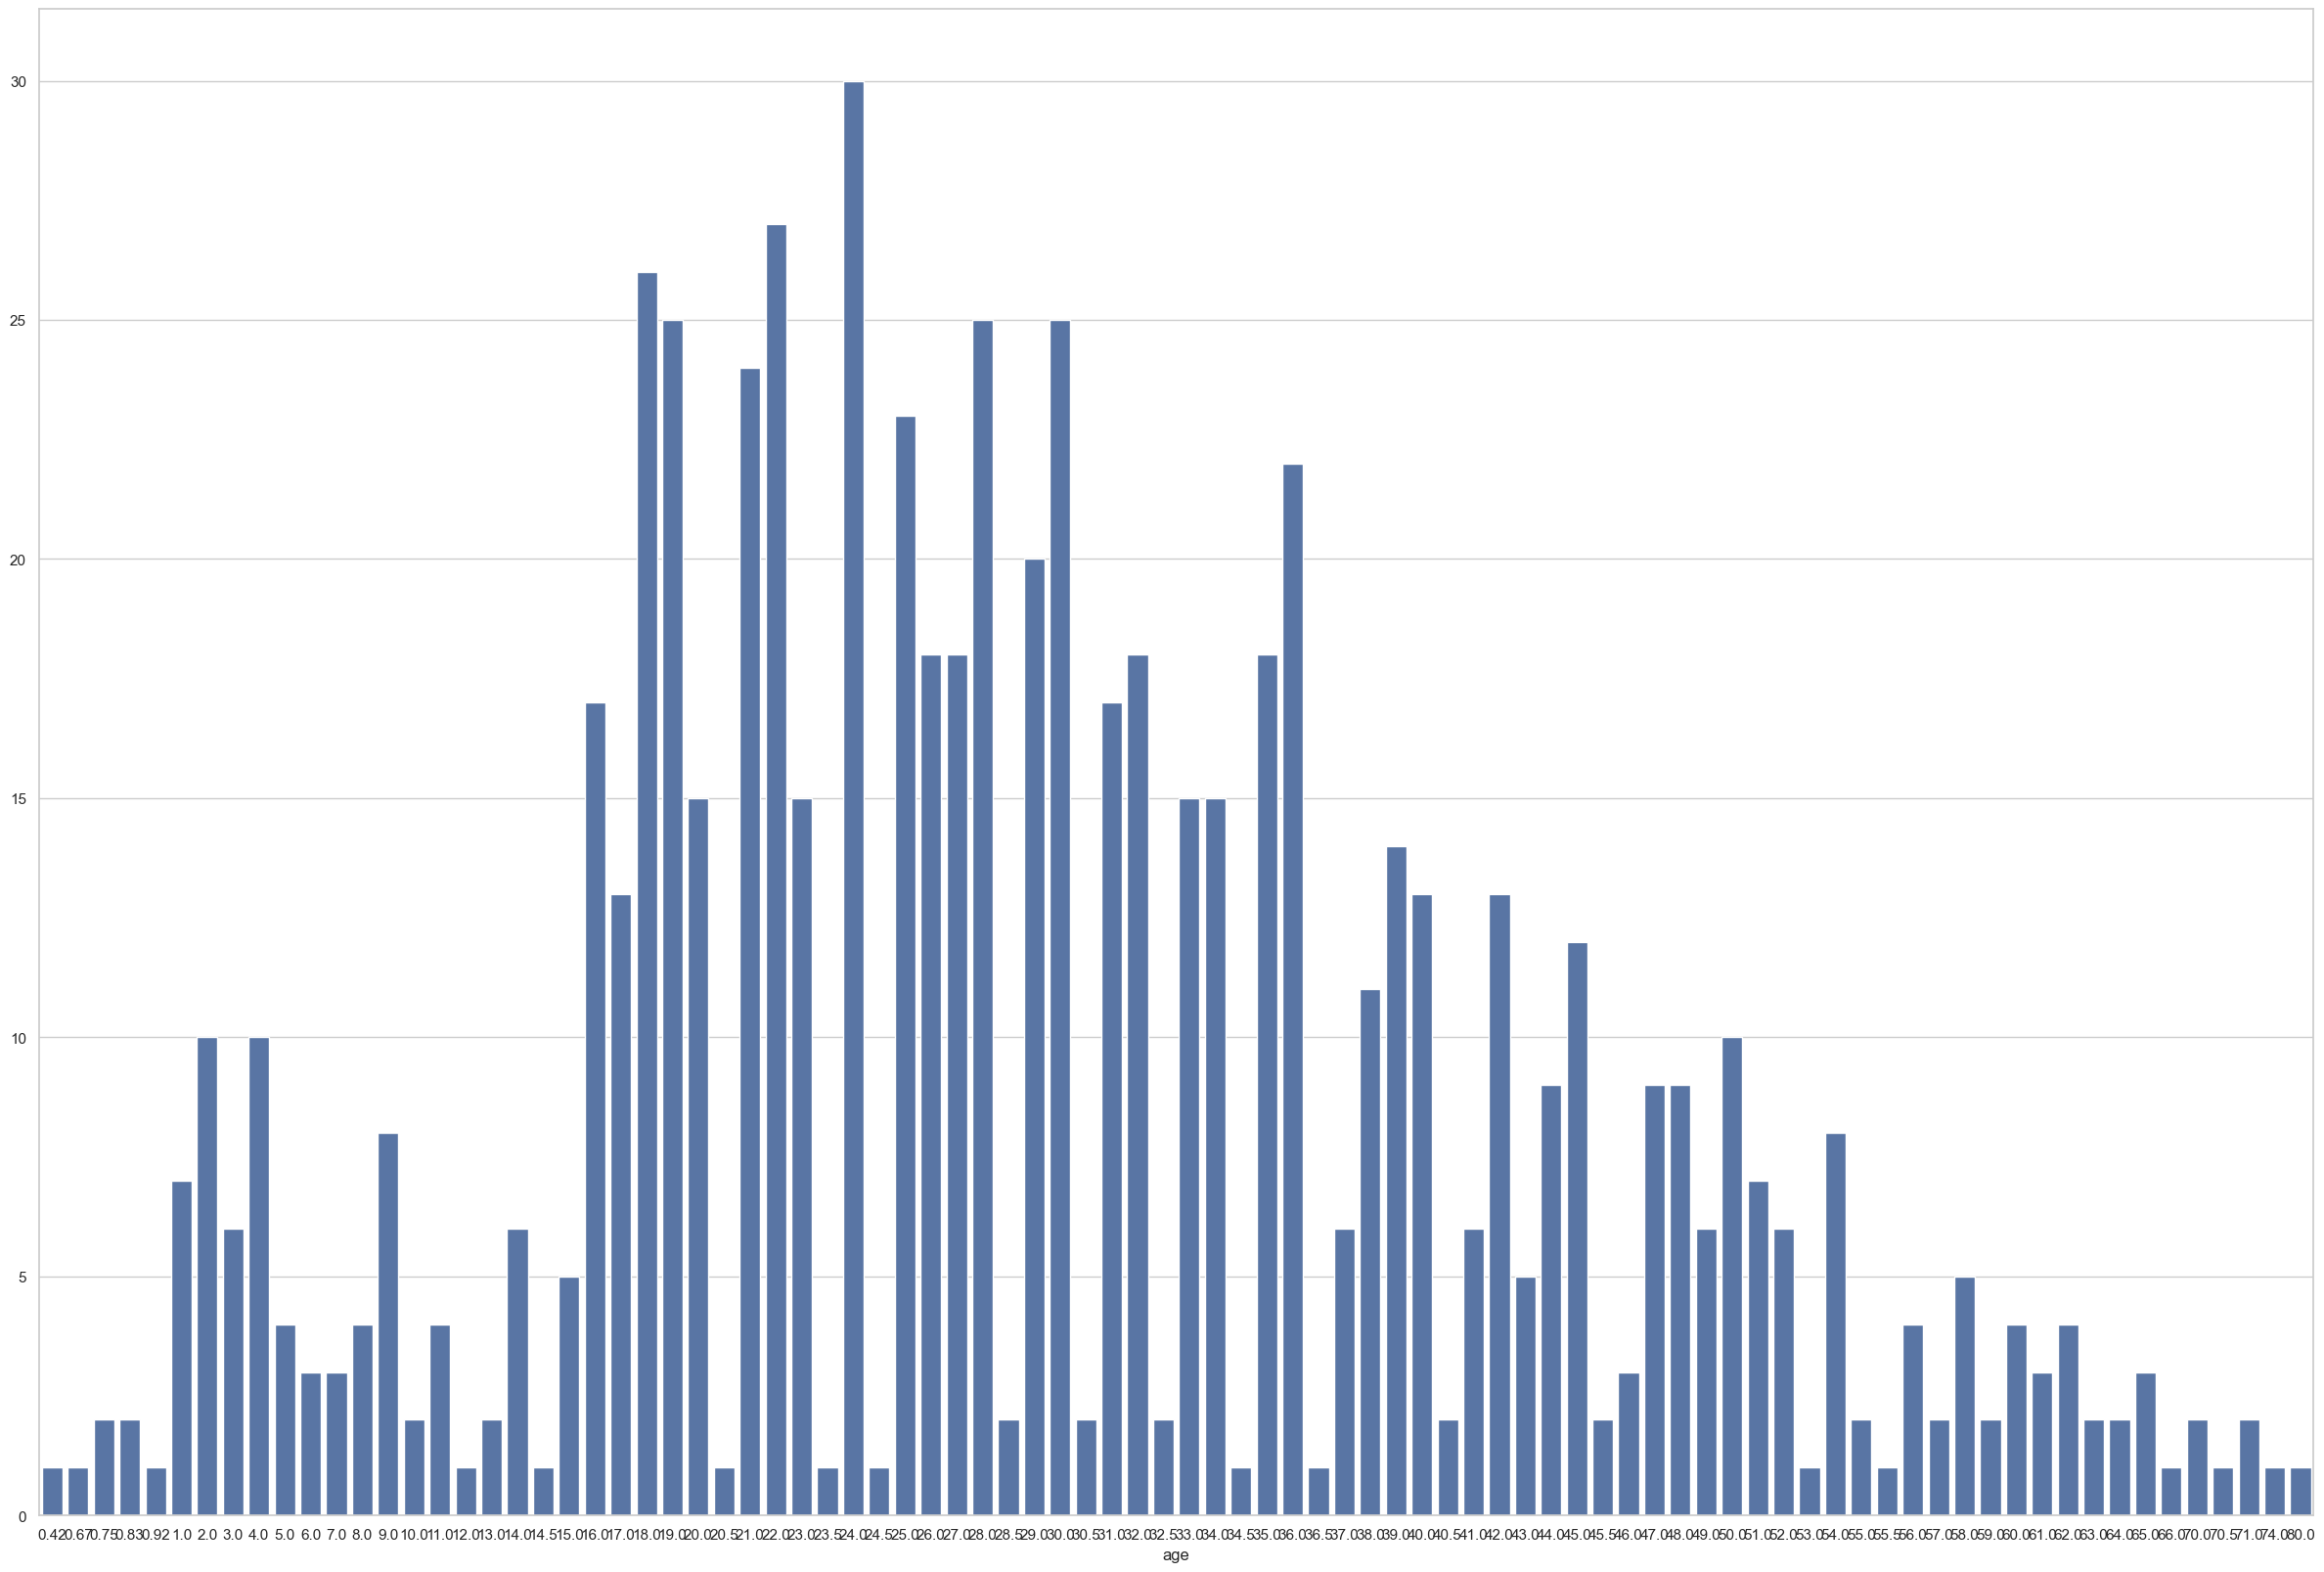

In [ ]:
plt.figure(figsize=(30, 20))
sns.barplot(y=titanic['age'].value_counts().values, x=titanic['age'].value_counts().index)
plt.show()

<Figure size 2000x500 with 0 Axes>

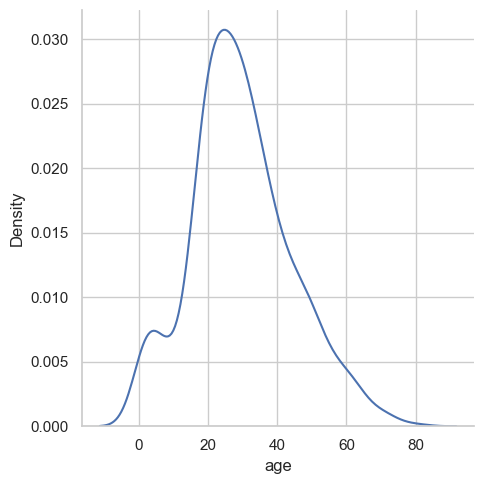

In [ ]:
plt.figure(figsize=(20, 5))
sns.displot(titanic['age'], kind='kde')
plt.show()

In [ ]:
from scipy.stats import shapiro, kstest, norm

# Teste de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(titanic['age'].fillna(28))
print(f"Shapiro-Wilk Teste: Estatistica={stat_shapiro}, p-valor={p_shapiro}")
print('')

if p_shapiro > 0.05:
    print('É uma distribuição normal')
else:
    print('Não é uma distribuição normal')

Shapiro-Wilk Teste: Estatistica=0.9541046573646538, p-valor=4.651141686041376e-16

Não é uma distribuição normal


In [ ]:
 # Teste de Kolmogorov-Smirnov
stat_kstest, p_kstest = kstest(titanic['age'].fillna(28), 'norm', args=(np.mean(titanic['age'].fillna(28)), np.std(titanic['age'].fillna(28))))
print(f"Kolmogorov-Smirnov Teste: Estatistica={stat_kstest}, p-valor={p_kstest}")

print('')

if p_kstest > 0.05:
    print('É uma distribuição normal')
else:
    print('Não é uma distribuição normal')

Kolmogorov-Smirnov Teste: Estatistica=0.14660650371835493, p-valor=3.5322970247810665e-17

Não é uma distribuição normal


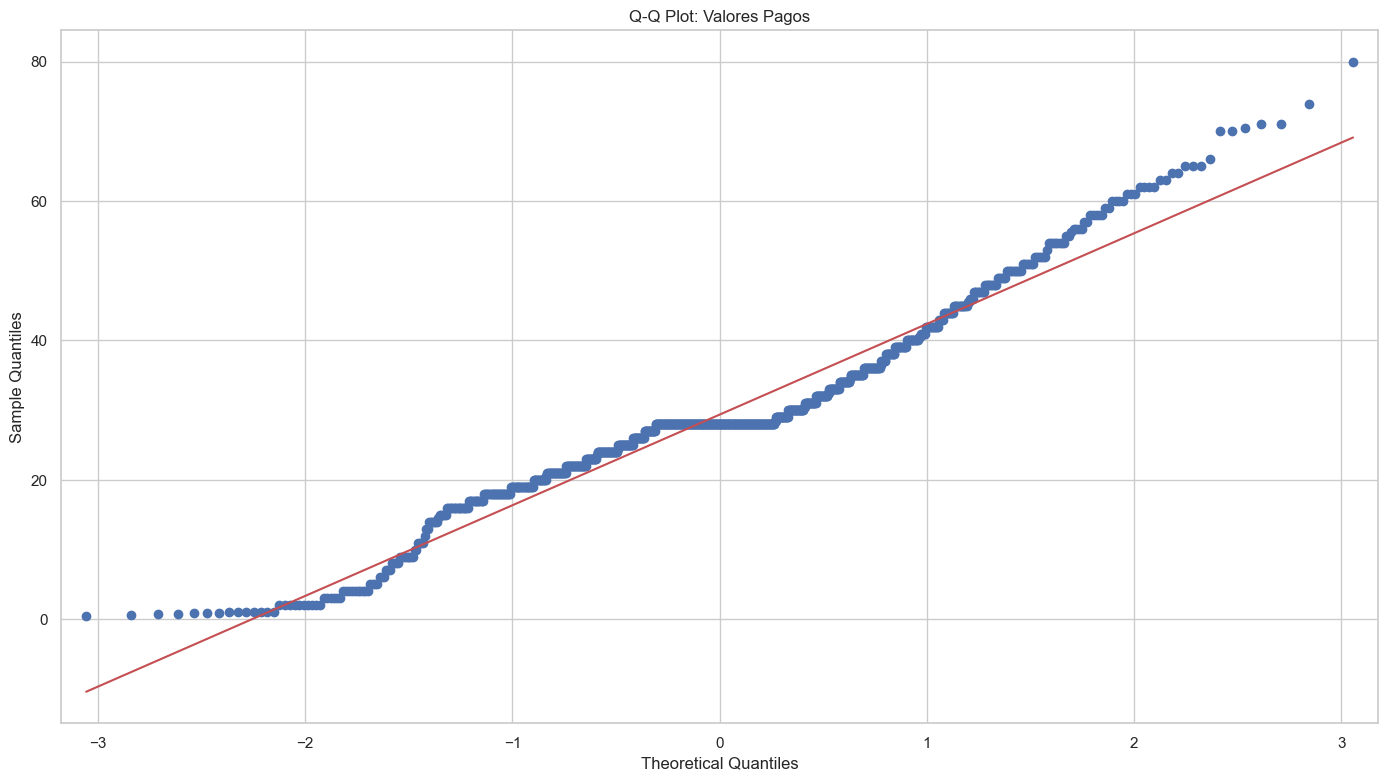

In [ ]:
# Q-Q Plot
import statsmodels.api as sm

sm.qqplot(titanic['age'].fillna(28), line='s')
plt.title("Q-Q Plot: Valores Pagos")
plt.show()

- Se o p-valor > 0.05: Não rejeitamos a hipótese nula ( $H_0$), ou seja, os dados seguem uma distribuição normal.
- Se o p-valor ≤ 0.05: Rejeitamos a hipótese nula ($H_0$), ou seja, os dados não seguem uma distribuição normal.


## PCA

A Análise de Componentes Principais (PCA) é uma técnica estatística utilizada para reduzir a dimensionalidade de um conjunto de dados. Ela transforma um grande número de variáveis correlacionadas em um conjunto menor de variáveis não correlacionadas, conhecidas como componentes principais. O objetivo do PCA é simplificar a complexidade dos dados, preservando a maior parte da variabilidade presente no conjunto original.

**As principais limitações do PCA incluem:** 
1. **Assumir linearidade:** O PCA só captura relações lineares entre variáveis, podendo ser ineficaz para dados com relações não lineares. 
2. **Sensibilidade à escala:** Variáveis com diferentes escalas podem influenciar os componentes principais. Por isso, é necessário padronizar os dados antes de aplicar o PCA. 
3. **Interpretação dos componentes:** Os componentes principais são combinações lineares das variáveis originais e podem ser difíceis de interpretar, especialmente em dados complexos. 
4. **Dados faltantes:** O PCA não lida bem com valores ausentes. É necessário tratar os dados faltantes antes de aplicar a técnica. 
5. **Assume normalidade:** Embora não seja um requisito rigoroso, os melhores resultados são obtidos quando os dados são aproximadamente normais. 

O PCA é uma ferramenta poderosa para redução de dimensionalidade e análise exploratória de dados, mas suas limitações devem ser consideradas ao interpretar os resultados e tomar decisões com base nessa técnica.


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Transformar o dataset em um DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Adicionar a coluna alvo (target) ao DataFrame
diabetes_df['target'] = diabetes.target

# Exibir as primeiras linhas do DataFrame
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
from sklearn.decomposition import PCA
X = diabetes_df.drop('target',axis=1).values
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.40242108 0.14923197]
[2.00604356 1.22160537]


**explained_variance_ratio_**

- Representa a proporção da variância total dos dados explicada por cada componente principal.
- Um bom valor depende do contexto, mas geralmente:
    - Para análise exploratória: Os primeiros componentes devem explicar 70% a 90% da variância total.
    - Para redução de dimensionalidade: Escolha componentes que expliquem uma proporção significativa da variância (ex.: 95%).

**Como avaliar:**

- Some os valores de explained_variance_ratio_ para os componentes selecionados.
- Se a soma for alta (ex.: ≥ 0.8), os componentes capturam bem a variabilidade dos dados.

Exemplo:
- [0.65, 0.25]
- O primeiro componente explica 65% da variância, e o segundo explica 25%.
- Juntos, explicam 90% da variância, o que é considerado bom.

---

**singular_values_**

- Representa os valores singulares associados aos componentes principais.
- Eles indicam a magnitude da contribuição de cada componente para os dados.
- Não há um "valor bom" específico, mas:
    - Valores maiores indicam que o componente captura mais informação.
    - Compare os valores entre os componentes para entender sua relevância relativa.

Exemplo:
- [15.3, 8.7]
- O primeiro componente (15.3) contribui mais que o segundo (8.7), indicando que ele é mais relevante.



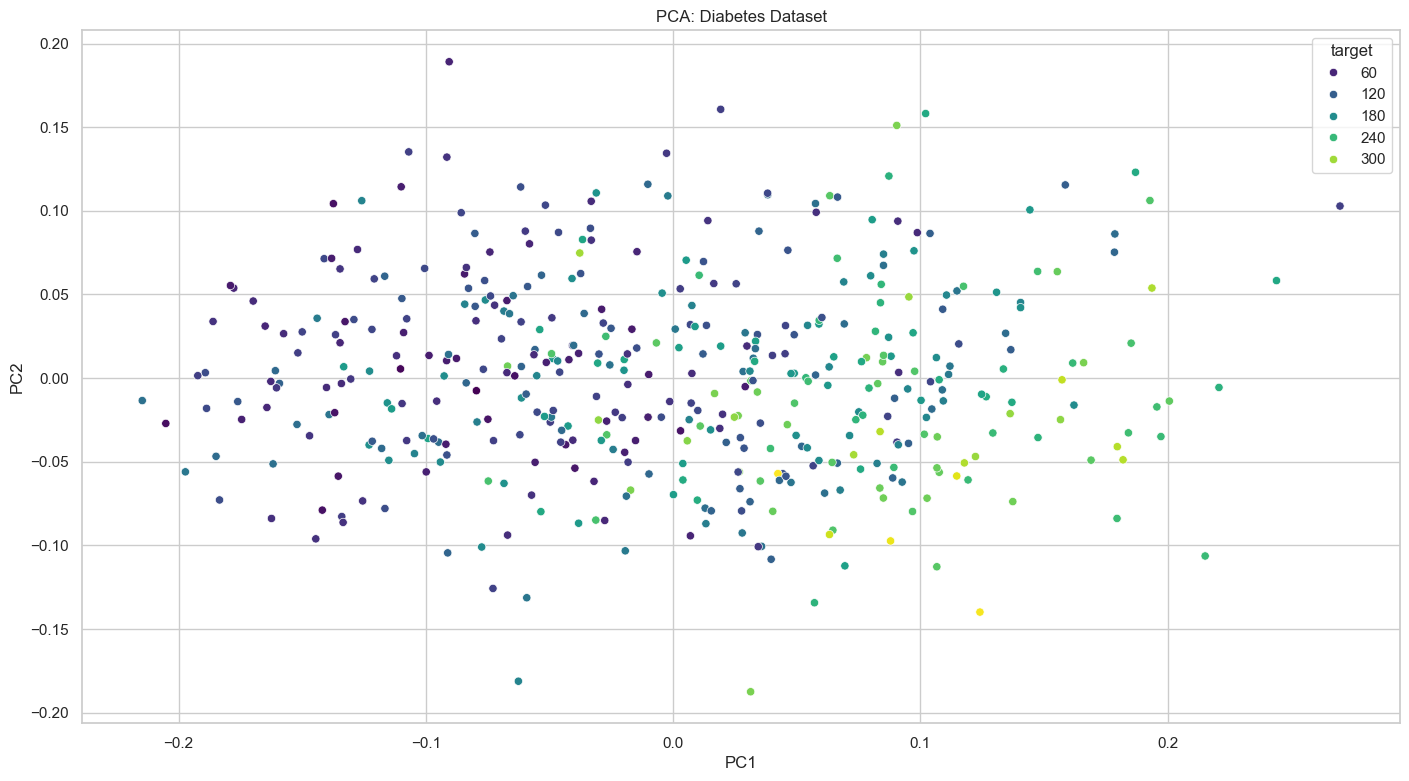

In [ ]:
df = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2'])
df['target'] = diabetes_df['target']
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title('PCA: Diabetes Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
X = diabetes_df[['s1', 's2', 's3','s4', 's5', 's6']].values
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.54594331 0.21808828]
[1.80987841 1.14390983]


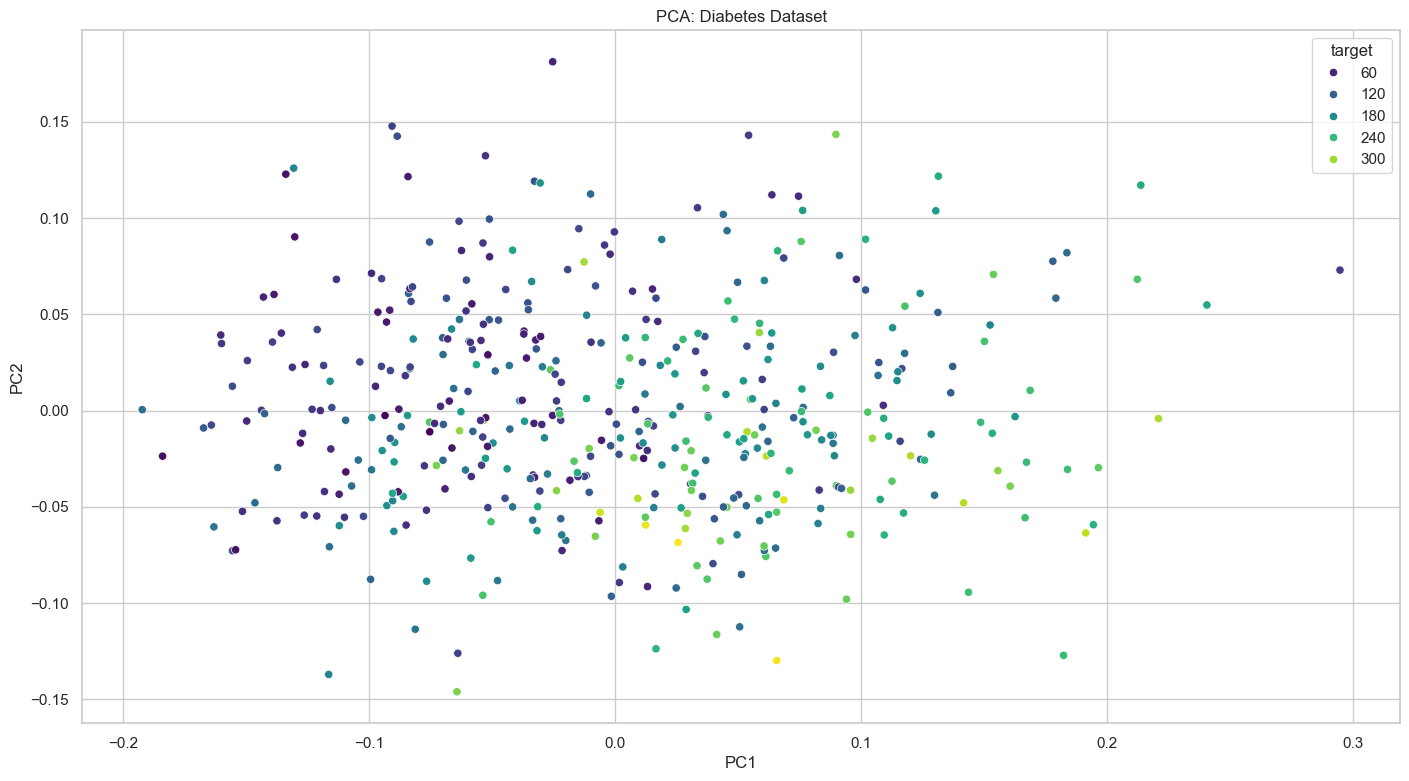

In [ ]:
df = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2'])
df['target'] = diabetes_df['target']
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title('PCA: Diabetes Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

# Transformar o dataset em um DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adicionar a coluna alvo (target) ao DataFrame
iris_df['target'] = iris.target

# Exibir as primeiras linhas do DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[0.92461872 0.05306648]
[25.09996044  6.01314738]



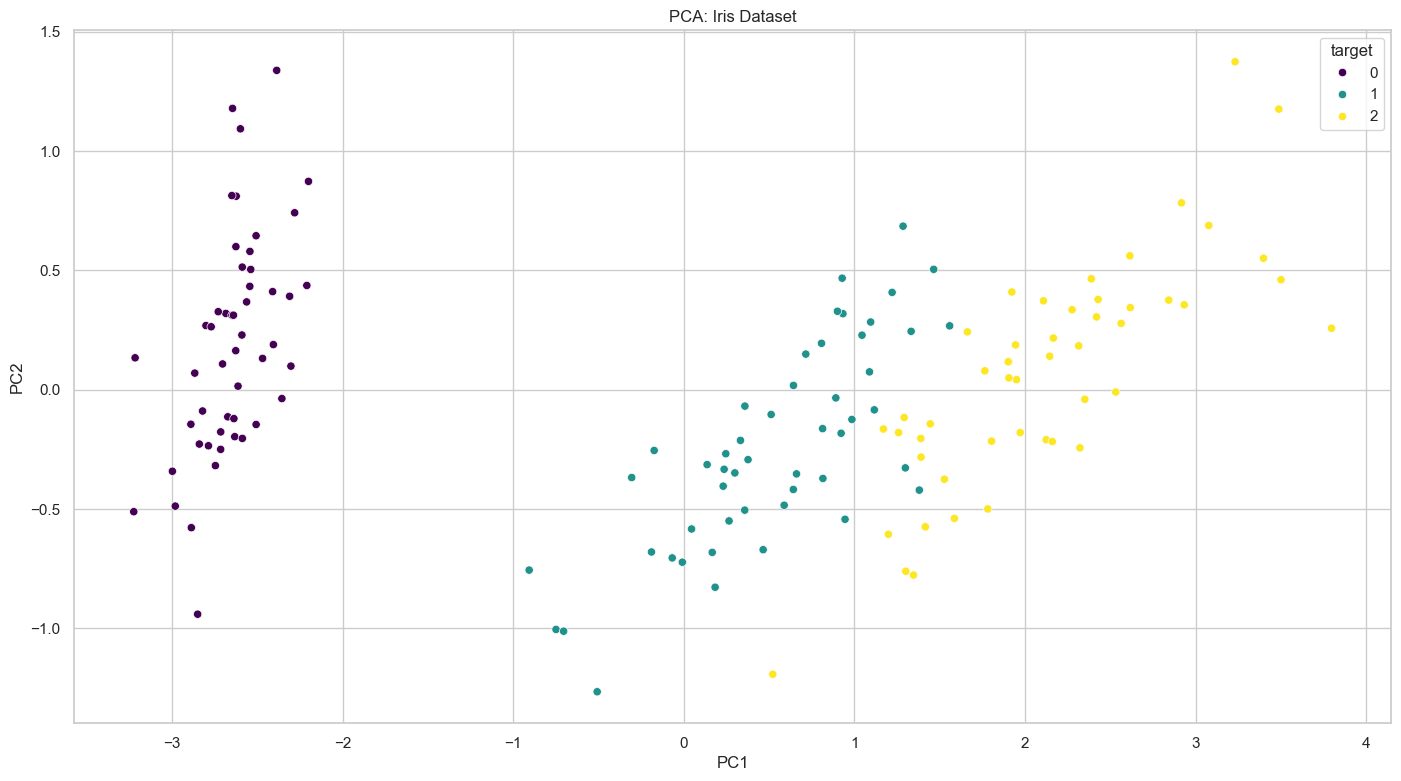

In [ ]:
from sklearn.decomposition import PCA
X = iris_df.drop('target',axis=1).values
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print('')
df = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2'])
df['target'] = iris_df['target']
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title('PCA: Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Correlação e associação

**Correlação:** 
A correlação é um conceito estatístico que mede o grau de associação entre duas variáveis. No caso de dados contínuos, ela reflete o quanto uma variável muda em relação à outra. Quando uma variável aumenta e a outra tende a aumentar ou diminuir, há correlação.

**Coeficiente de Correlação de Pearson:** 
Uma forma comum de medir correlação é o coeficiente de correlação de Pearson, que varia entre -1 e 1: 
- Um valor próximo de **1** indica uma correlação positiva forte (quando uma variável aumenta, a outra também tende a aumentar). 
- Um valor próximo de **-1** indica uma correlação negativa forte (quando uma variável aumenta, a outra tende a diminuir). 
- Um valor próximo de **0** sugere ausência de relação linear significativa entre as variáveis. 

**Fórmula do Coeficiente de Pearson:** 
$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $$ 

$\text{Onde:}$ 
- $x_i \text{ e } y_i \text{ são os valores individuais das variáveis } x \text{ e } y$. 

- $\bar{x} \text{ e } \bar{y} \text{ são as médias das variáveis } x \text{ e } y$.


**Diferença entre Correlação e Associação:** 

**Associação:** 
A associação é um conceito mais amplo que descreve qualquer tipo de relação entre duas variáveis. Não é restrita a relações lineares e pode incluir: 
- Relações não lineares. 
- Relações causais ou não causais. 
- Qualquer ligação ou dependência observada entre variáveis. 

Enquanto a correlação é uma forma específica de medir associação, nem toda associação é capturada pela correlação. 

**Resumo:** 
A correlação é uma medida quantitativa específica para relações lineares, enquanto a associação é um termo mais geral que abrange qualquer tipo de relação entre variáveis, linear ou não.

$\textbf{Os métodos mais comuns para medir associação entre variáveis incluem:} \\$ 


1. $\textbf{Correlação de Pearson:} \\$
    É utilizado para medir a associação linear entre duas variáveis contínuas. O coeficiente de Pearson funciona bem quando as variáveis são aproximadamente normais e as relações são lineares. É sensível à presença de outliers, que podem influenciar a medida. 

    $\textbf{Fórmula:} \\ $
    $$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} \\ $$
    $\text{Onde:} \\$
    -  $x_i \text{ e } y_i \text{ são os valores das variáveis, e }$
    - $\bar{x} \text{ e } \bar{y} \text{ são suas médias.} \\$

2. $\textbf{Correlação de Spearman:} \\ $
    Um método não paramétrico baseado nos rankings dos dados. Ele é ideal para dados com relações monotônicas, mesmo quando não são lineares. Não requer que os dados sejam normais e é menos sensível a outliers. 

    $\textbf{Fórmula:} \\ $
    $$r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} \\ $$
    $\text{Onde:} \\$
    - $d_i \text{ é a diferença entre os rankings de cada observação, e }$
    - $n \text{ é o número total de pares.} \\$

3. $\textbf{Correlação de Kendall:} \\ $
    Também não paramétrica, essa medida avalia a força da associação ordinal entre variáveis. É útil para conjuntos de dados com rankings, mas pode ser computacionalmente mais lenta em grandes amostras. 

    $\textbf{Fórmula:} \\ $
    $$\tau = \frac{C - D}{\frac{1}{2} n(n-1)} \\ $$
    $\text{Onde:} \\$
    - $C \text{ é o número de pares concordantes, } $
    - $D \text{ é o número de pares discordantes, e } $
    - $n \text{ é o número total de observações.} \\$

4. $\textbf{Coeficiente de Contingência:} \\ $
    Utilizado para medir associação entre variáveis categóricas dispostas em uma tabela de contingência. Requer a aplicação do teste qui-quadrado ($\chi^2$), e é limitado a interpretações em pequenas tabelas. 

    $\textbf{Fórmula:} \\ $
    $$C = \sqrt{\frac{\chi^2}{\chi^2 + n}} \\ $$
    $\text{Onde:} \\$
    - $\chi^2 \text{ é o valor do teste de qui-quadrado e } $
    - $n \text{ é o tamanho da amostra.} \\$

    $$\chi^2 = \displaystyle\sum_{} \frac{(O_i - E_i)^2}{E_i}$$

    Onde:
    - $O_i$ = valores observados (frequências reais nos dados).
    - $E_i$ = valores esperados  (frequências que seriam esperadas sob a hipótese nula)

5. $\textbf{Coeficiente Phi:} \\ $
    Usado especificamente para medir associação em variáveis binárias (categóricas com dois níveis). Quando aplicado em tabelas 2x2, é uma extensão do qui-quadrado. 

    $\textbf{Fórmula:} \\ $
    $$\phi = \frac{\chi^2}{n} \\$$

6. $\textbf{Informação Mútua:} \\ $
    Baseada na teoria da informação, mede dependência entre variáveis (lineares ou não lineares). É flexível, mas requer cálculos baseados em probabilidades. 

    $\textbf{Fórmula:} \\ $
    $$I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \frac{p(x, y)}{p(x)p(y)} \\ $$
    $\text{Onde:} \\$
    - $p(x, y) \text{ é a probabilidade conjunta de } X \text{ e } Y, \text{ e } $
    - $p(x) \text{ e } p(y) \text{ são as probabilidades marginais.}$


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
diabetes = load_diabetes()

# Transformar o dataset em um DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Adicionar a coluna alvo (target) ao DataFrame
diabetes_df['target'] = diabetes.target

# Exibir as primeiras linhas do DataFrame
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


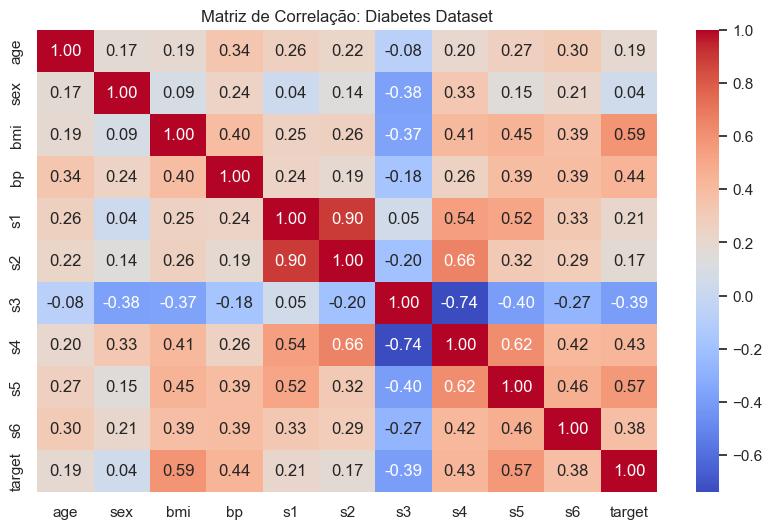

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação: Diabetes Dataset')
plt.show()

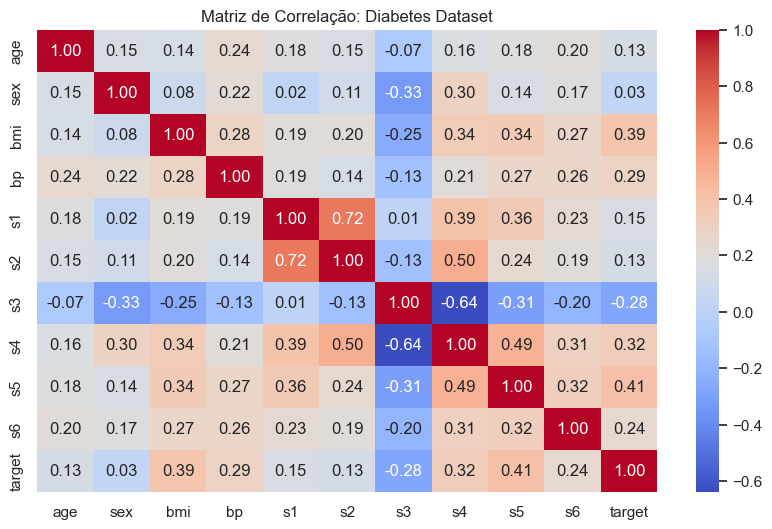

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_df.corr(method='kendall'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação: Diabetes Dataset')
plt.show()

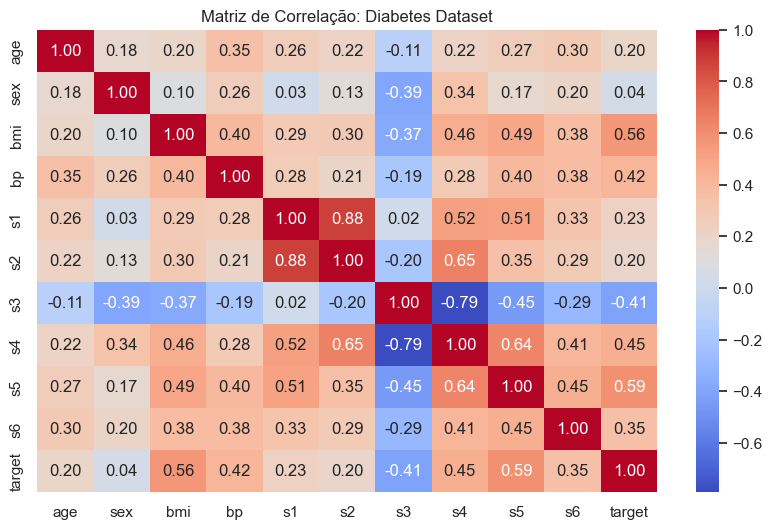

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação: Diabetes Dataset')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Tabela de contingência (exemplo de dados categóricos)
# Linhas e colunas representam categorias
contingency_table = np.array([[20, 30, 50],
                              [10, 40, 50]])

# Teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Coeficiente de contingência
n = np.sum(contingency_table)
contingency_coefficient = np.sqrt(chi2 / (chi2 + n))

print(f"Valor de qui-quadrado: {chi2}")
print(f"Valor-p: {p_value}")
print(f"Grau de liberdade: {dof}")
print(f"Coeficiente de contingência: {contingency_coefficient}")


Valor de qui-quadrado: 4.761904761904762
Valor-p: 0.09246247606291999
Grau de liberdade: 2
Coeficiente de contingência: 0.15249857033260467


Graus de liberdade (ou degrees of freedom) são um conceito estatístico que representa o número de valores independentes que podem variar em uma análise, enquanto ainda atendem a certas restrições. Eles desempenham um papel crucial em testes estatísticos e na interpretação de distribuições amostrais.

**Interpretação**:
- $H_0$: Assume que não há associação ou diferença significativa entre as variáveis.
- Um valor de $\chi^2$ alto (> 6) indica que há uma grande discrepância entre os valores observados e esperados, possivelmente rejeitando a hipótese nula.
- Um valor de $\chi^2$ baixo indica que os valores observados estão próximos dos esperados, sugerindo que não há evidência suficiente para rejeitar a hipótese nula.
- Os graus de liberdade indicam quantos valores são "livres para variar" ao calcular uma estatística. dado por:
$$ df = (\text{número de linhas} - 1) \cdot (\text{número de colunas} - 1) $$

In [ ]:
import numpy as np
from sklearn.metrics import mutual_info_score

# Exemplo de dados categóricos
x = [0, 0, 1, 1, 0, 1, 0, 1]
y = [1, 1, 0, 0, 1, 0, 1, 0]

# Cálculo da Informação Mútua
info_mutua = mutual_info_score(x, y)

print(f"Informação Mútua entre x e y: {info_mutua}")


Informação Mútua entre x e y: 0.6931471805599452


In [ ]:
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer

# Dados contínuos simulados
np.random.seed(42)
x = np.random.normal(0, 1, 1000)  # Variável x (dados normais)
y = 2 * x + np.random.normal(0, 1, 1000)  # Variável y, com alguma relação com x

# Discretização dos dados contínuos
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
x_discrete = discretizer.fit_transform(x.reshape(-1, 1)).flatten()
y_discrete = discretizer.fit_transform(y.reshape(-1, 1)).flatten()

# Cálculo da Informação Mútua
info_mutua = mutual_info_score(x_discrete, y_discrete)

print(f"Informação Mútua entre x e y (dados discretizados): {info_mutua}")


Informação Mútua entre x e y (dados discretizados): 0.661142847193061


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification

# Geração de dataset para classificação
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Cálculo da informação mútua entre cada característica e o alvo
info_mutua_features = mutual_info_classif(X, y, random_state=42)

# Exibindo a importância das características
for i, value in enumerate(info_mutua_features):
    print(f"Informação Mútua - Feature {i+1}: {value}")


Informação Mútua - Feature 1: 0.04961330070164993
Informação Mútua - Feature 2: 0.003922703952803364
Informação Mútua - Feature 3: 0.0
Informação Mútua - Feature 4: 0.07390264383042111
Informação Mútua - Feature 5: 0.13342041612062916
Informação Mútua - Feature 6: 0.08847041574103476
Informação Mútua - Feature 7: 0.03356945946085932
Informação Mútua - Feature 8: 0.018846896434379534
Informação Mútua - Feature 9: 0.009720450146748938
Informação Mútua - Feature 10: 0.13871824006900435


## Feature Selection

1. **Método Gráficos**:
    Gráficos para identificar variaveis nulas, outliers, histogramas e heatmaps para entender a distribuição e analisar as relações das variaveis.

2. **Correlação**:
    Alta correlação entre as variaveis podem influenciar modelos de regressão.

3. **Variância**:
    Variaveis com baixa variação podem ser removidas pois são menos informativas ao modelo por não contribuiem significamente para a distinção entre classes

4. **Feature Importance**:
    Em modelos como árvores de decisão (boosting ou bagging) ou em uma regressão logística, diferentes variáveis contruibuem de formas diferentes para a o modelo. O cálculo do *feature importance* serve para medir a relevância de cada variável no contexto do modelo.
    - Ajuda na interpretação do modelo
    - Ajuda na remoção de variaveis irrelavantes.
    - Foca nas variaveis mais impactantes, melhorando assim o modelo.

    **Como calcular**:
        
    - Coeficientes da regressão (Modelos lineares): A magnetude dos coeficientes (se eles estiverem na mesma escala) mostra a importância de cada variável.
    - Ganho em Árvore de decisão: Mede a redução da incerteza ao dividir os dados com base em uma variável.
    - Permutação Aleatória: Avalia o impacto de variáveis ao embaralhá-las e observar como o desempenho do modelo muda. Uma grande redução na performance indica que a característica é importante
    - SHAP Values (Shapley Additive Explanations): Um método mais avançado, que explica a contribuição de cada variável para cada predição.

5. **Boruta**:
    O Boruta busca encontrar *todas* as variáveis relevantes dos modelos preditivos. É baseado no algoritmo de *Random Forest* e funciona da seguinte forma:
    - Criação de uma variável sombra: Ela cria cópias aleatórios das variáveis originais para servir como referência
    - Comparação: A importância de cada variável original é comparada com a variável sombra
    - Decisão: Se a importância de uma variável original for constantimente maior que a das variáveis sombra, ela é considerada relevante. Caso contrário, é descartada.
    **Por que usar?**:
    - Compreensão completa: Ela ajuda a encontrar todas as variável que contribuem para o modelo, não apenas as mais óbvias.
    - Robustez: Por ser baseado em Random Forest, é resistente a dados ruidosos e correlação entre variáveis.



In [ ]:
# Importando as bibliotecas necessárias
# Exemplo do usado da boruta
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from boruta import BorutaPy
import pandas as pd
import numpy as np

np.random.seed(42)

# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=42)
# Transformando em DataFrame para melhor visualização
X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])
X['Feature_21x'] = np.random.rand(1000)  # Adicionando uma feature aleatória
# Criando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicando o Boruta
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)
boruta.fit(X.values, y)

# Verificando quais variáveis foram selecionadas
selected_features = X.columns[boruta.support_].tolist()
print("Variáveis Selecionadas:", selected_features)

# Verificando variáveis rejeitadas
rejected_features = X.columns[~boruta.support_].tolist()
print("Variáveis Rejeitadas:", rejected_features)

Variáveis Selecionadas: ['Feature_1', 'Feature_6', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_19']
Variáveis Rejeitadas: ['Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_7', 'Feature_8', 'Feature_13', 'Feature_17', 'Feature_18', 'Feature_20', 'Feature_21x']


In [ ]:
boruta.ranking_

array([ 1,  4,  2,  3,  7,  1, 10, 11,  1,  1,  1,  1,  9,  1,  1,  1,  5,
        6,  1, 12,  8])

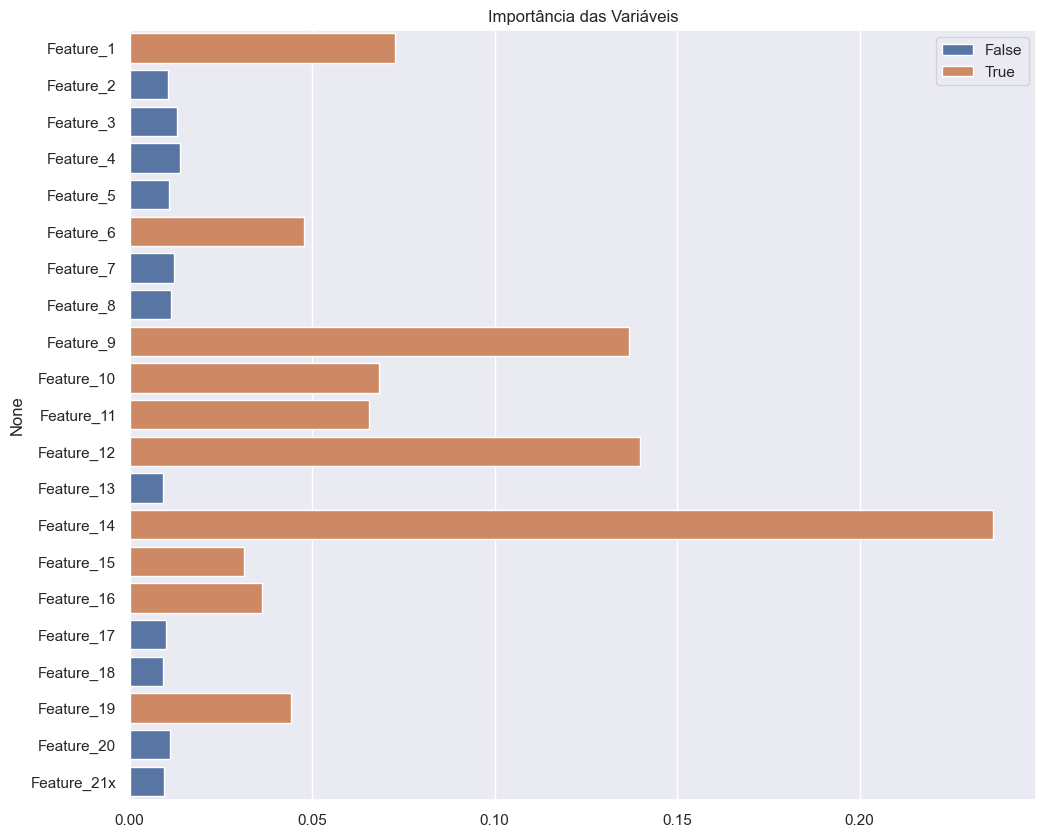

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
rf.fit(X.values, y)
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X.columns, x=rf.feature_importances_, hue=boruta.support_)
plt.title('Importância das Variáveis')
plt.show()

**SHAP**

In [ ]:
import shap
def f(x):
    return rf.predict_proba(x)[:, 1]


med = X.mean().values.reshape((1, X.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X.iloc[0:1000, :])

PermutationExplainer explainer: 1001it [00:17, 25.68it/s]                         


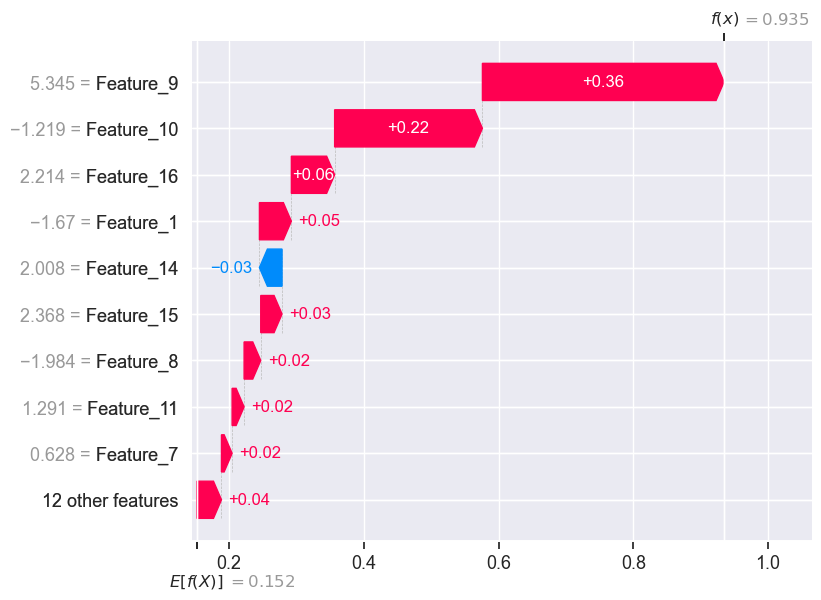

In [ ]:
shap.plots.waterfall(shap_values[0])

Variáveis Selecionadas: ['Feature_1', 'Feature_6', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_19']

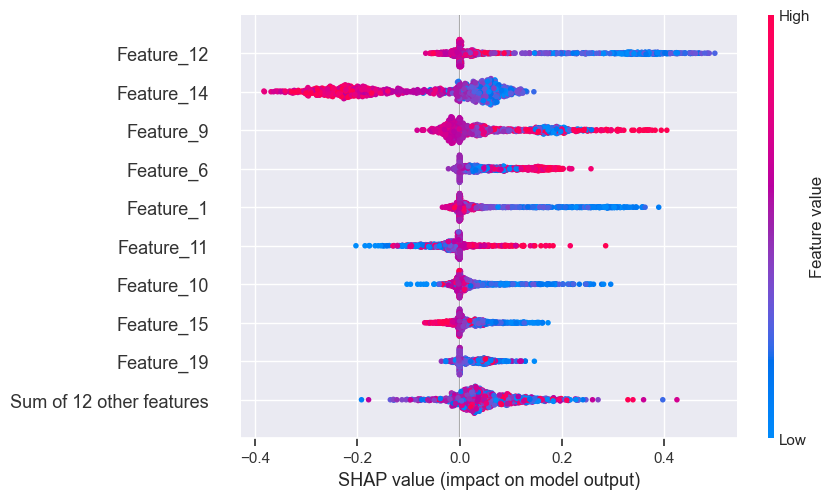

In [ ]:
shap.plots.beeswarm(shap_values)


Tomando o valor absoluto e usando uma cor sólida, obtemos um compromisso entre a complexidade do gráfico de barras e o gráfico completo do enxame de abelhas. Observe que os gráficos de barras acima são apenas estatísticas resumidas dos valores mostrados nos gráficos de enxame de abelhas abaixo.

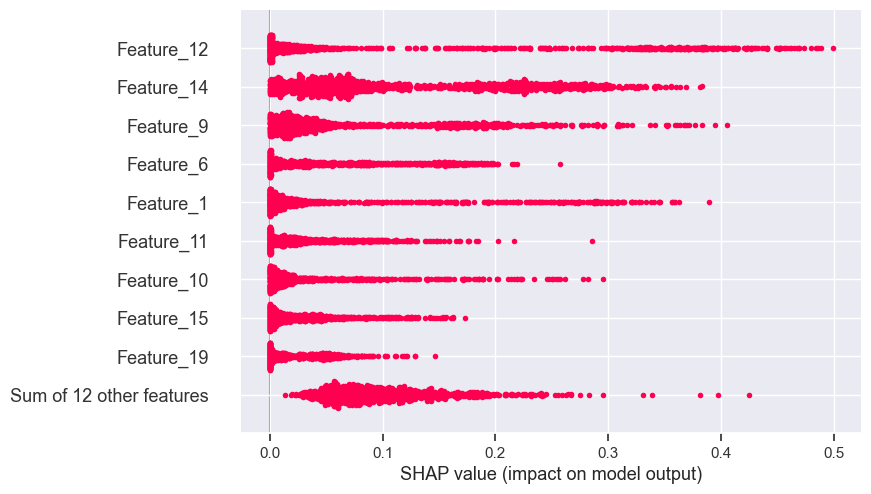

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

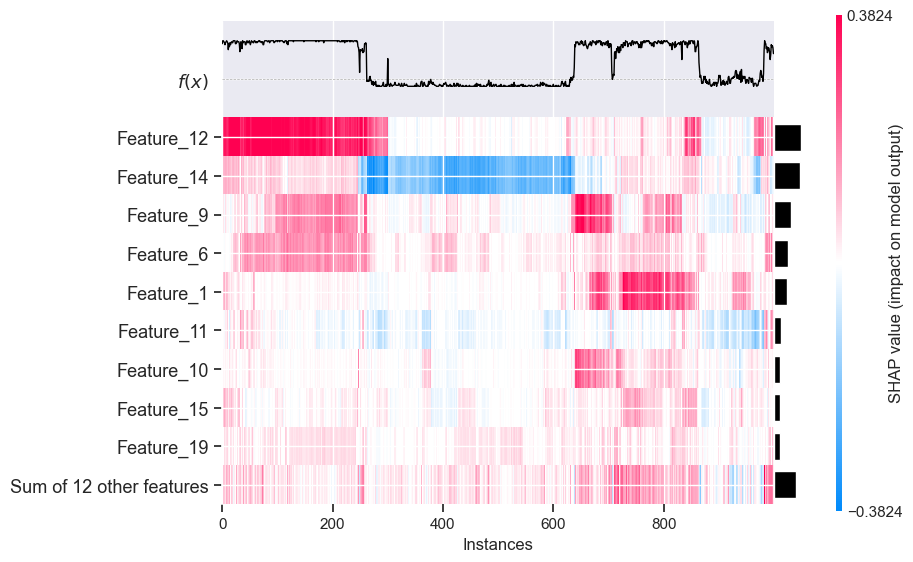

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values)

In [ ]:
clustering = shap.utils.hclust(X, y)

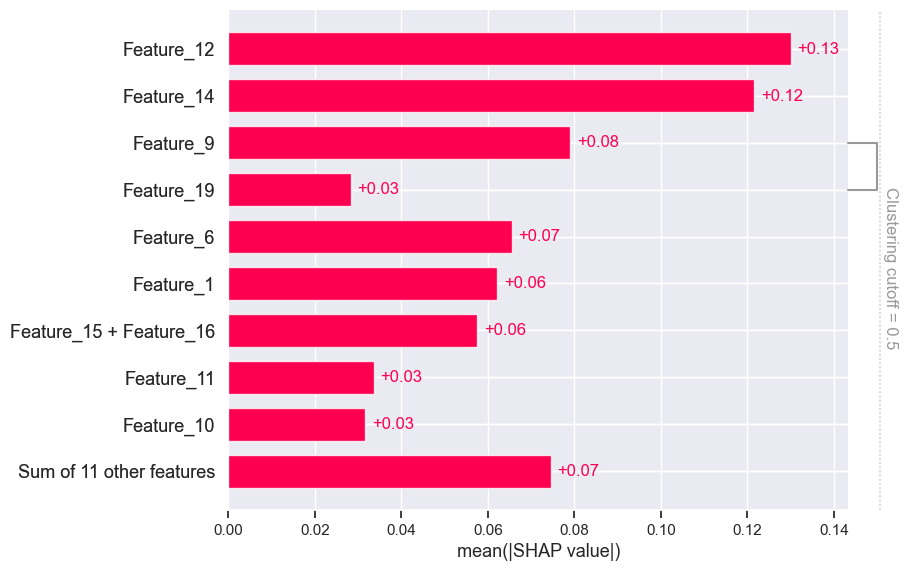

In [ ]:
shap.plots.bar(shap_values, clustering=clustering)

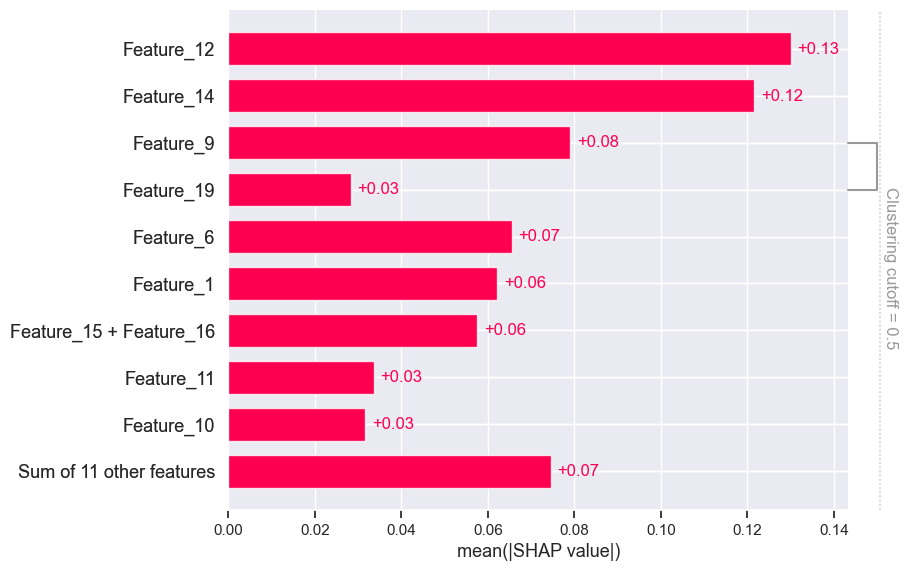

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.5)


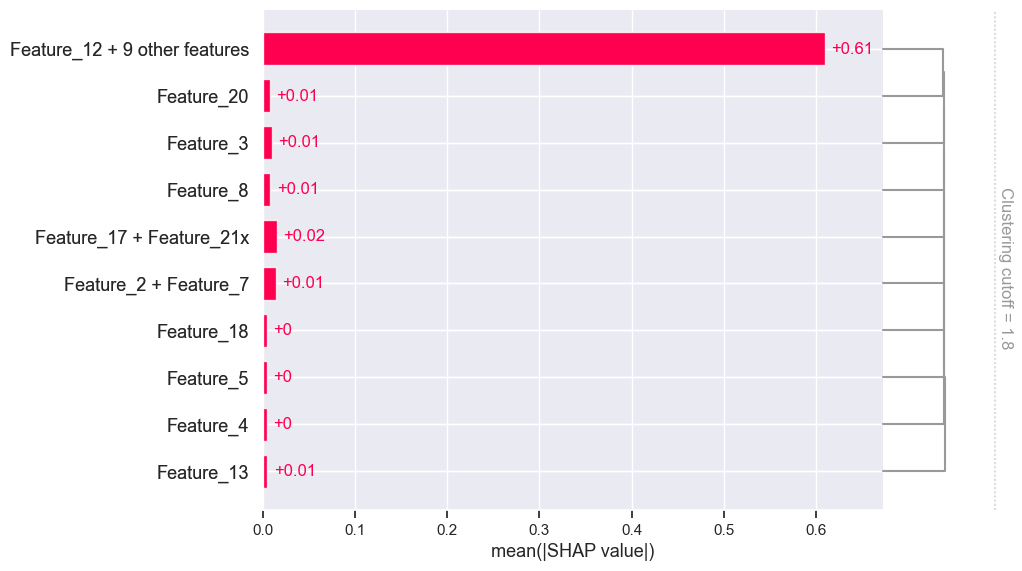

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)


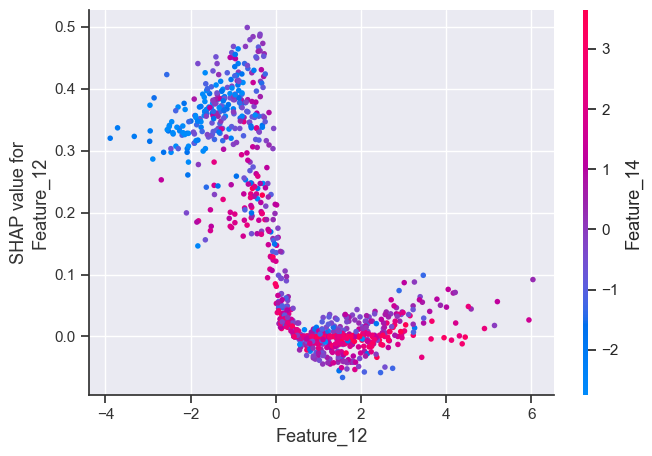

In [ ]:
shap.dependence_plot("Feature_12", shap_values.values, X.iloc[0:1000, :], interaction_index='Feature_14')

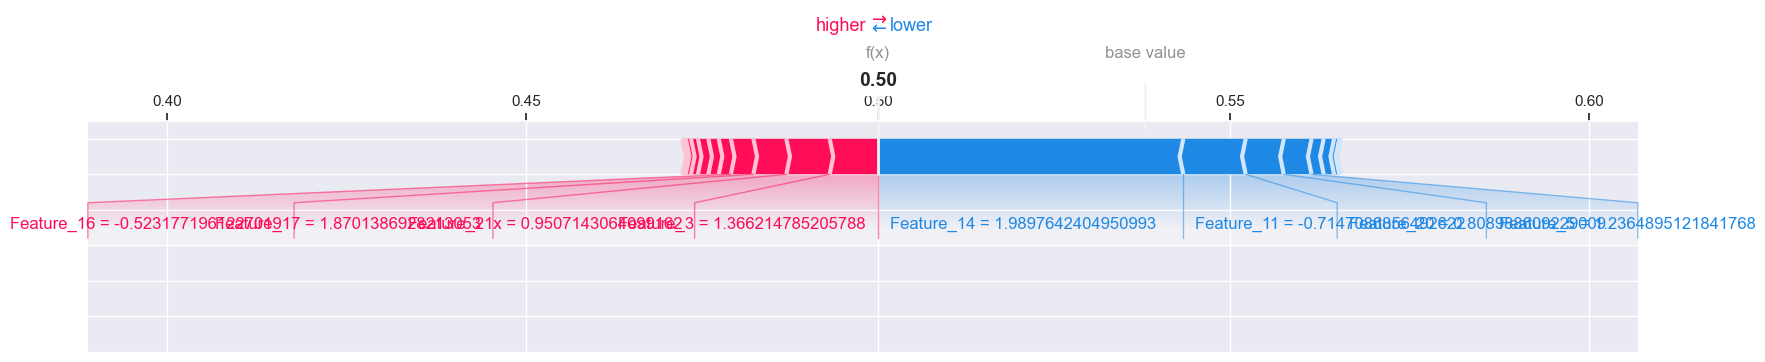

In [ ]:
# shap.initjs()
shap.plots.force(shap_values[1], matplotlib=True, show=True, link='logit', feature_names=X.columns)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0:100])

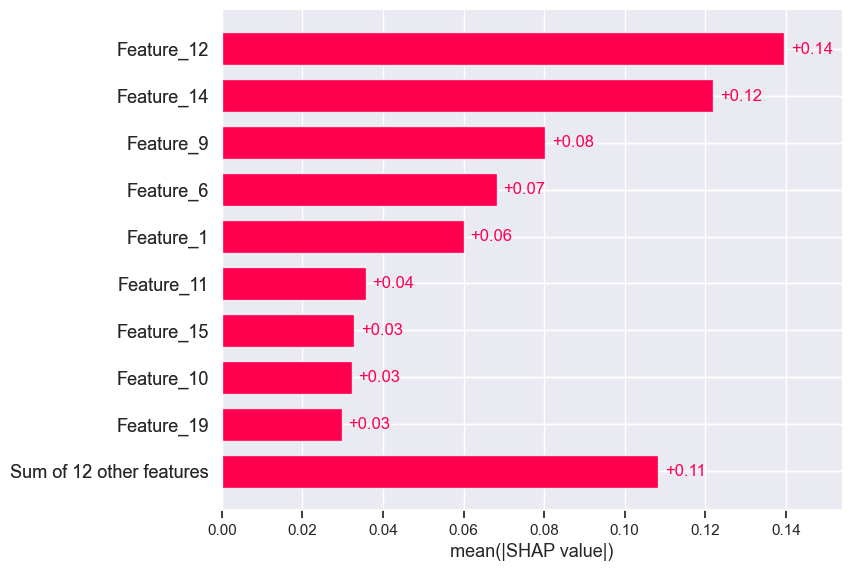

In [ ]:
shap.plots.bar(shap_values[0:100], max_display=10)

Mas o valor absoluto médio não é a única maneira de criar uma medida global de importância do recurso, podemos usar qualquer número de transformações. Aqui mostramos como o uso do valor absoluto máximo destaca os recursos de ganho de capital e perda de capital, uma vez que eles têm efeitos pouco frequentes, mas de alta magnitude.

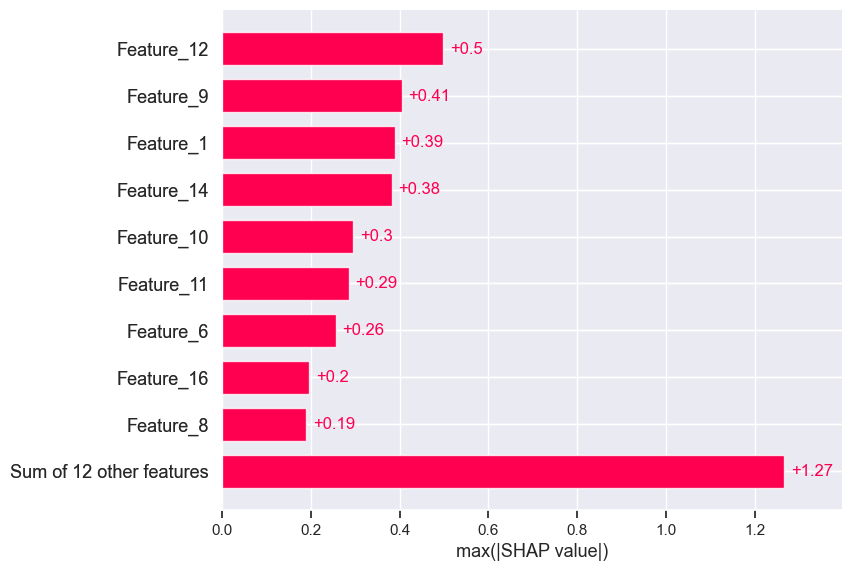

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

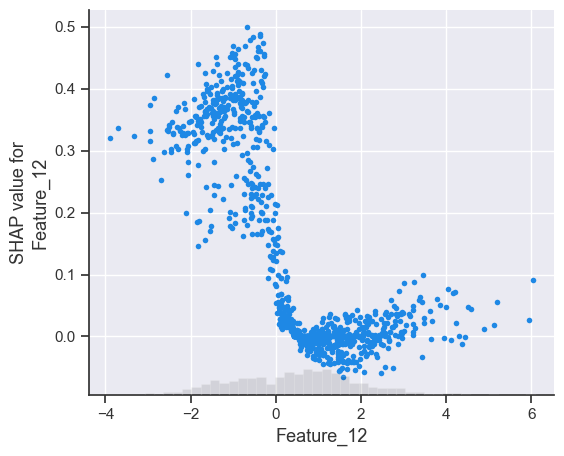

In [ ]:
shap.plots.scatter(shap_values[:,'Feature_12'])

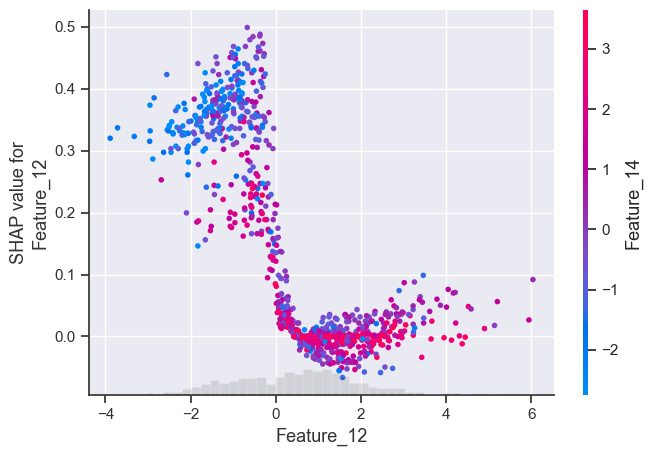

In [ ]:
shap.plots.scatter(shap_values[:,'Feature_12'], color=shap_values[:,'Feature_14'])